# import libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import plotly

# import the dataset

In [59]:
df = pd.read_csv('insurance.csv')

# check the shape of the df and the number of rows-columns

In [60]:
# shape of the df
print(f'Shape of the df: {df.shape}')

# number of rows
print(f'Number of rows of the df: {df.shape[0]}')

# number of columns
print(f'Number of columns of the df: {df.shape[1]}')

Shape of the df: (1338, 7)
Number of rows of the df: 1338
Number of columns of the df: 7


# check the df

In [61]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# check for nan-duplicates

In [62]:
# check for nan values
df.isnull().mean() * 100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64

In [63]:
# check for duplicates
df.drop_duplicates(inplace=True)

In [64]:
df.shape

(1337, 7)

# Statistics

In [65]:
# find the average age
print(f'Average age: {int(df['age'].mean())}')

Average age: 39


In [66]:
# max age
print(f'Max age: {df['age'].max()}')

Max age: 64


In [67]:
# min age
print(f'Min age: {df['age'].min()}')

Min age: 18


In [68]:
# mean expenses
print(f'Mean Expenses: {df['expenses'].mean():.2f}$')

Mean Expenses: 13279.12$


In [69]:
# mean bmi
print(f'Mean BMI: {df['bmi'].mean():.2f}')

Mean BMI: 30.67


# Visualizations

<Axes: title={'center': 'Expenses for Both Sexes Based on Age'}, xlabel='age', ylabel='expenses'>

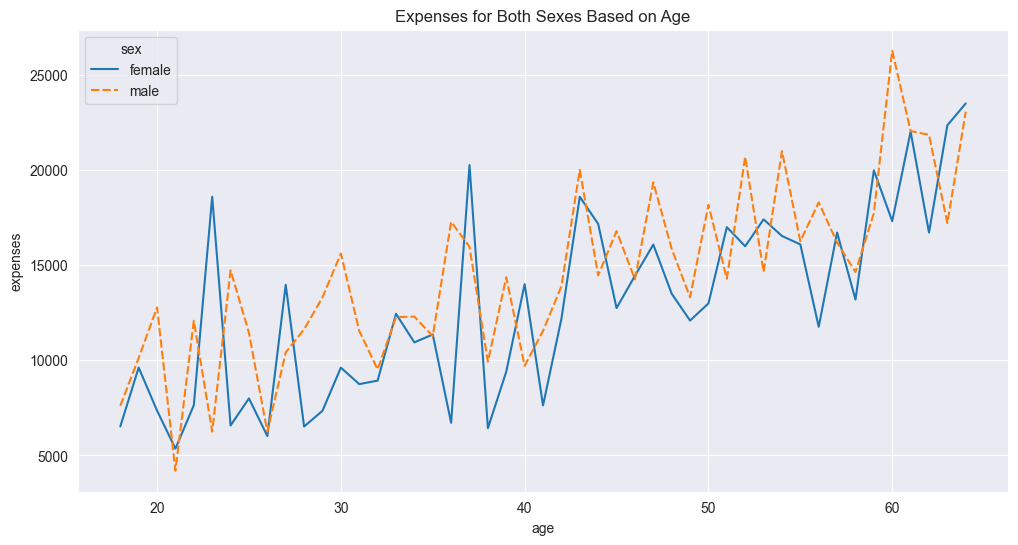

In [70]:
# display the expenses for both sexes based on their age
plt.figure(figsize=(12, 6))
plt.title('Expenses for Both Sexes Based on Age')
sns.lineplot(data=df, x='age', y='expenses', hue='sex', style='sex', errorbar=None)

In [71]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


<Axes: title={'center': 'Expenses for Both Sexes Based on Age'}, xlabel='age', ylabel='expenses'>

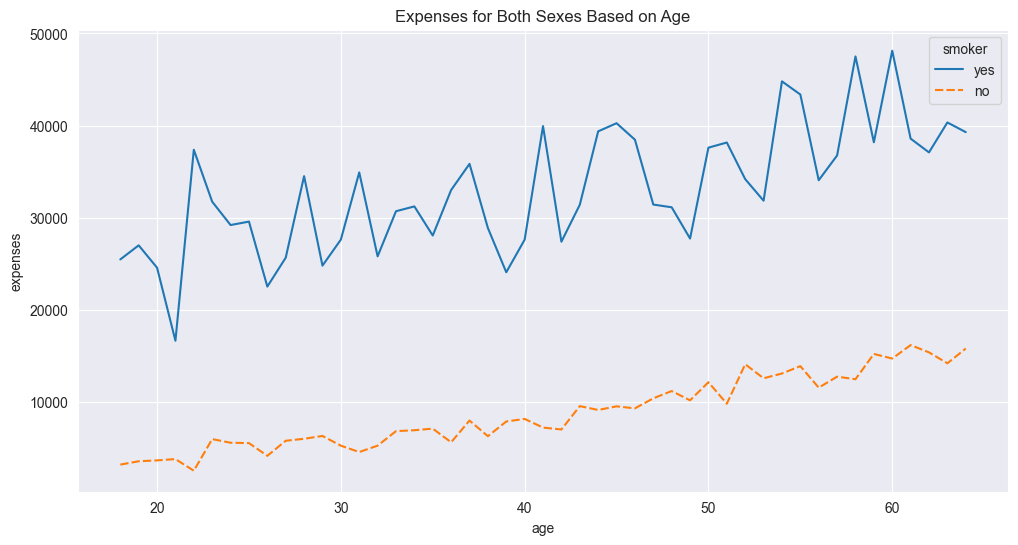

In [72]:
# display the expenses for both sexes based on if they smoke
plt.figure(figsize=(12, 6))
plt.title('Expenses for Both Sexes Based on Age')
sns.lineplot(data=df, x='age', y='expenses', hue='smoker', style='smoker', errorbar=None)

<Axes: xlabel='smoker', ylabel='expenses'>

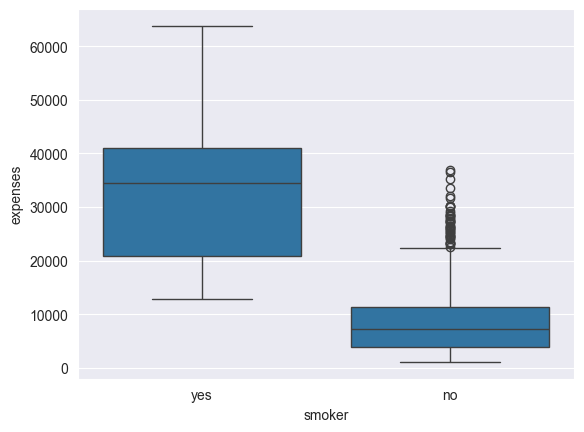

In [73]:
# boxplot based on smokers
sns.boxplot(data=df, x='smoker', y='expenses')

<Axes: xlabel='bmi', ylabel='expenses'>

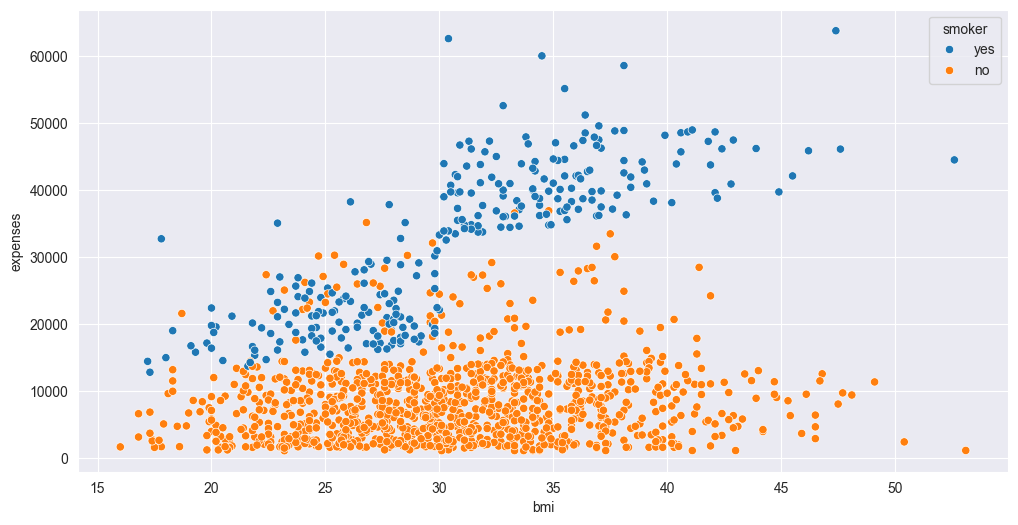

In [74]:
# scatterplot using the bmi and the smoker
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='bmi', y='expenses', hue='smoker')

<Axes: xlabel='expenses', ylabel='Count'>

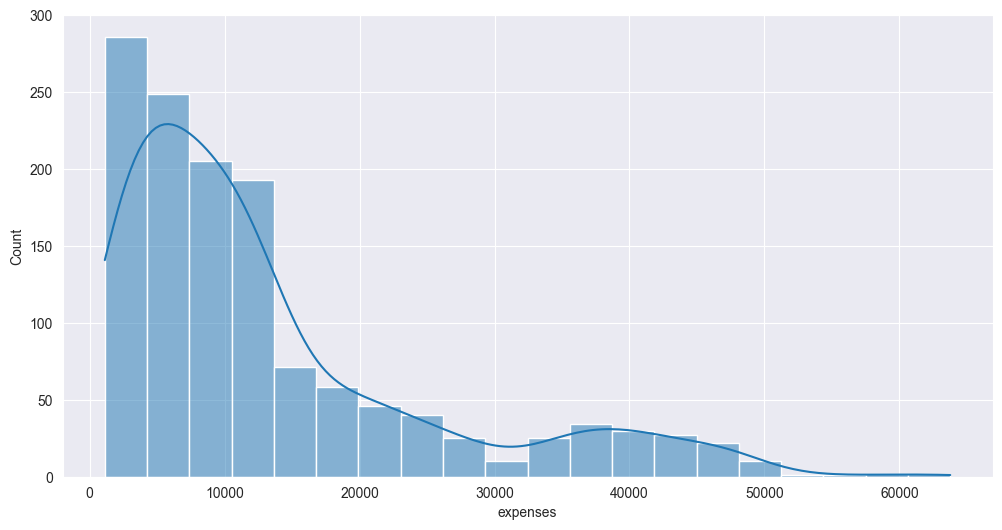

In [75]:
# histogram for expenses
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='expenses', bins=20, kde=True)

<Axes: xlabel='children', ylabel='expenses'>

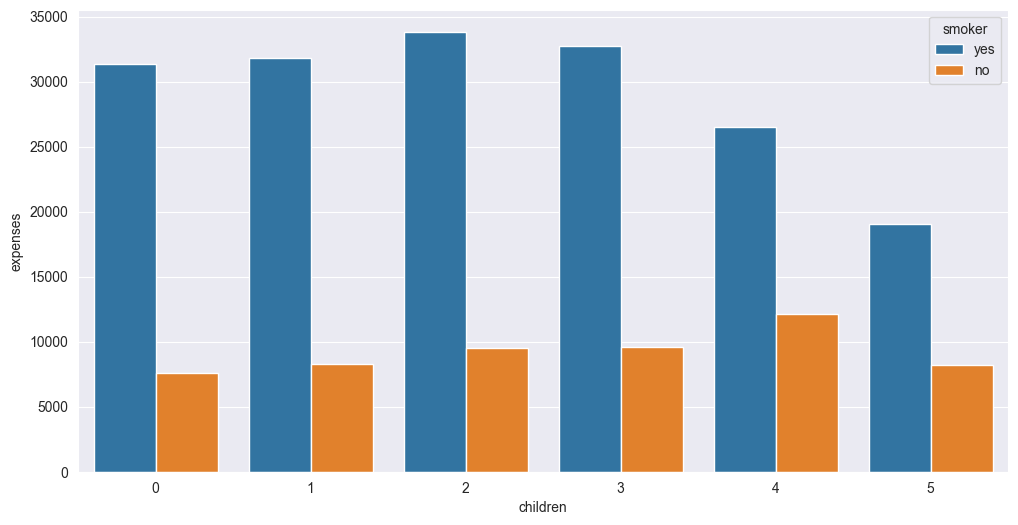

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='children', y='expenses', hue='smoker', errorbar=None)

<Axes: xlabel='region', ylabel='expenses'>

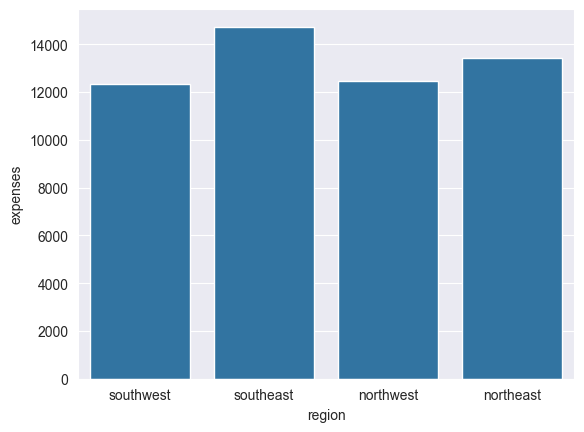

In [77]:
sns.barplot(data=df, x='region', y='expenses', errorbar=None)

# convert string column values to numerical

In [78]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [82]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])

le_smoker = LabelEncoder()
df['smoker'] = le_smoker.fit_transform(df['smoker'])

le_region = LabelEncoder()
df['region'] = le_region.fit_transform(df['region'])

In [84]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


# Split the dataset to Features and Target

In [85]:
# split the data to features and target
X = df.drop('expenses', axis=1)
y = df['expenses']

# Split the dataset to train and test data

In [86]:
# import train_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Linear Regression Model

In [89]:
# import Linear Regression Model
from sklearn.linear_model import LinearRegression

# create an instance of Linear Regression Model
regressor = LinearRegression()

# fit the model
regressor.fit(X_train, y_train)

LinearRegression()

# R2-Score

In [90]:
# for the training set
print(f'R2 Score for training set: {regressor.score(X_train, y_train):.2f}')

# for the testing set
print(f'R2 Score for testing set: {regressor.score(X_test, y_test):.2f}')

R2 Score for training set: 0.75
R2 Score for testing set: 0.73


# Model Predictions

In [91]:
predictions = regressor.predict(X_test)
predictions

array([ 4125.02852633,  4334.52461906, 11752.31951614, 11996.09193717,
       33452.6847652 ,  6099.0469998 , 11892.40501889,  3747.69481456,
       37674.50613898, 15505.07122949,  9781.44212826,  3118.02984399,
        4369.58604623, 30569.82530674, 34233.72531525, 30231.74562438,
        5572.4393363 ,  8907.41556404,  6251.56381034,  5609.6071095 ,
       28054.95508479,  9615.83311705, 27524.65758999,  8203.62842884,
        6786.56552722,  4575.25219153, 32579.84788958,  9007.15634787,
        6803.74149568,  7139.80581215,  7891.20794411, 10648.96054211,
       11884.66202305,  9407.53129139,  8195.42046636, 10770.17678692,
       14554.19306604,  8398.62427327, 13807.98007278, 11524.59774266,
        1135.43716121, 30768.21328301,  5855.71697282,  2354.01584953,
       10657.64870294, 14279.81697212, 13361.66473773, 36153.59805731,
       35075.0511573 ,   908.9736237 , 11588.56580471, 14092.93037036,
        9392.17739686, 37372.59311489, 12465.67974007, 10385.26998078,
      

# Model Residuals

In [93]:
residuals = y_test - predictions
residuals

1108   -1220.938526
125     -949.124619
233      581.510484
334     7148.488063
953     5545.865235
           ...     
897      781.147650
901     8367.729909
868     1802.696793
1238     572.977571
339     -826.184369
Name: expenses, Length: 268, dtype: float64

# MSE, MAE

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'MSE: {mean_squared_error(y_test, predictions)}')

MAE: 4044.5255715455346
MSE: 35890015.26421981


# Custom Predictions

In [98]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [113]:
random_feature = X.sample(1)
random_feature

,age,sex,bmi,children,smoker,region
748,47,0,36.0,1,0,3


In [122]:
random_feature.index[0]

748

In [117]:
custom_prediction = regressor.predict(random_feature)
custom_prediction[0]

11767.069006342432

In [124]:
true_value = y.loc[random_feature.index[0]]
true_value

8556.91

In [127]:
custom_prediction_residual = true_value - custom_prediction[0]
print(f'Customer Residual: {custom_prediction_residual:.2f}')

Customer Residual: -3210.16


In [128]:
# Visualize real-predicted values

Text(0.5, 1.0, 'Scatter Plot Using Real-Predicted Data')

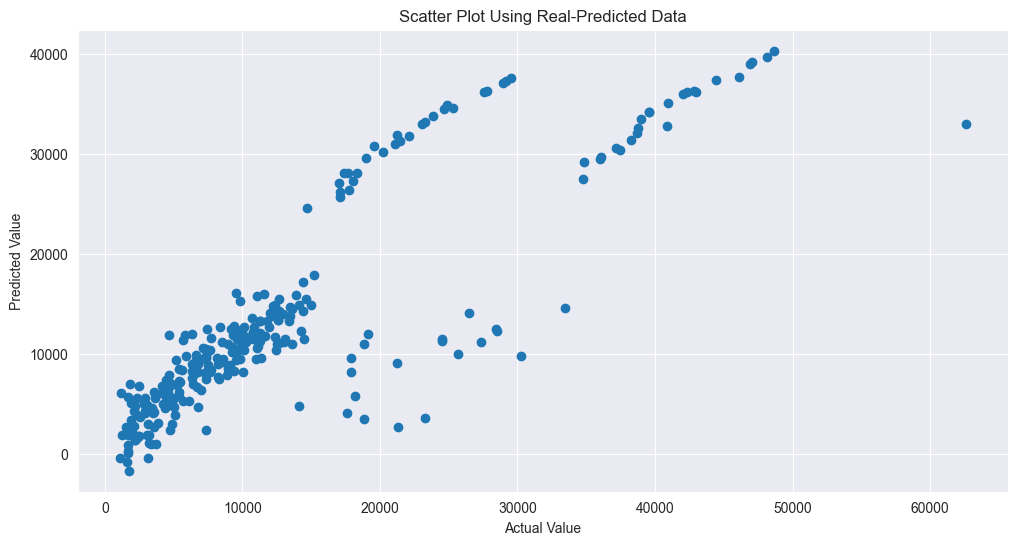

In [130]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Using Real-Predicted Data')